# ODL Assignment (Solution Development)
**Group number**: 15\
**Group leader**: Choong Man Shun (TP051283)\
**Group members**:
* Chew Cheng Yong (TP051338)
* Wong Poh Yee (TP051079)

# Table of Contents
[1. Exploratory Data Analysis (EDA)](#eda)\
[2. Data Preprocessing](#data_preprocessing)\
[4. Model Implementation](#model_implementation)
- [4.1 ?](#model_1)
  - [4.1.1 Base Model](#base_model_1)
  - [4.1.2 Model Hyperparameter Tuning](#model_hyperparameter_tuning_1)
  - [4.1.3 Final Model](#final_model_1)
- [4.2 ?](#model_2)
  - [4.2.1 Base Model](#base_model_2)
  - [4.2.2 Model Hyperparameter Tuning](#model_hyperparameter_tuning_2)
  - [4.2.3 Final Model](#final_model_2)
- [4.3 ?](#model_3)
  - [4.3.1 Base Model](#base_model_3)
  - [4.3.2 Model Hyperparameter Tuning](#model_hyperparameter_tuning_3)
  - [4.3.3 Final Model](#final_model_3)

In [49]:
import pandas as pd
import seaborn as sns
from imblearn.over_sampling import SMOTE
from keras import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# 1. Exploratory Data Analysis (EDA) <a id="eda"/>

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [5]:
df.shape

(10000, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
df.describe(include='all').select_dtypes("object")

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457
mean,NaN,NaN,NaN
std,NaN,NaN,NaN
min,NaN,NaN,NaN
25%,NaN,NaN,NaN
50%,NaN,NaN,NaN
75%,NaN,NaN,NaN


In [9]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
df.duplicated().sum()

0

[Text(0, 0, 'Age'),
 Text(1, 0, 'Balance'),
 Text(2, 0, 'EstimatedSalary'),
 Text(3, 0, 'CustomerId'),
 Text(4, 0, 'HasCrCard'),
 Text(5, 0, 'Tenure'),
 Text(6, 0, 'RowNumber'),
 Text(7, 0, 'CreditScore'),
 Text(8, 0, 'NumOfProducts'),
 Text(9, 0, 'IsActiveMember')]

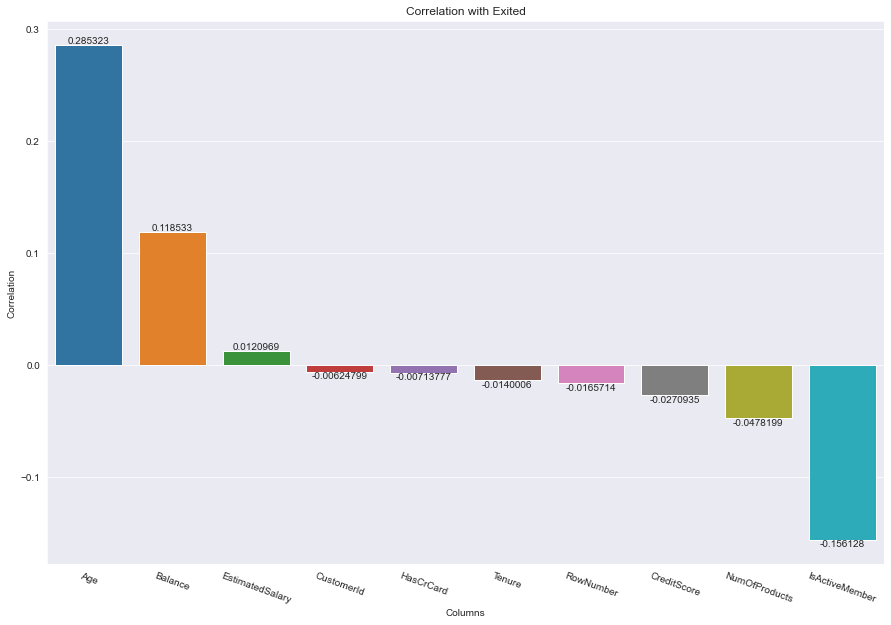

In [11]:
predictor_df = df.drop(columns="Exited")
corr_df = predictor_df.corrwith(df.Exited).sort_values(ascending=False)

plt.figure(figsize=(15, 10))

barplot = sns.barplot(x=corr_df.index, y=corr_df.values, orient="v")
barplot.bar_label(barplot.containers[0])
barplot.set(title="Correlation with Exited", xlabel="Columns", ylabel="Correlation")
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=-20)

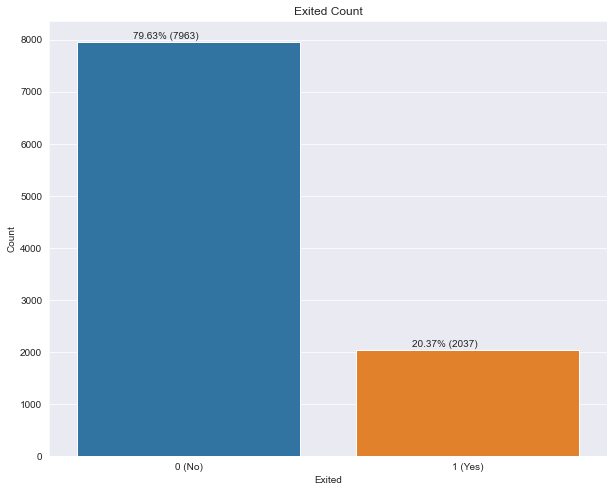

In [12]:
plt.figure(figsize=(10, 8))

barplot = sns.countplot(x=df.Exited)
barplot.set(
    title="Exited Count",
    xlabel="Exited",
    ylabel="Count",
    xticklabels=["0 (No)", "1 (Yes)"]
)

for p in barplot.patches:
    percentage = p.get_height() / len(df)
    x = p.get_x() + 0.2
    y = p.get_height() + 60
    barplot.annotate(f"{percentage:.2%} ({p.get_height()})", (x, y))

# 2. Data Preprocessing <a id="data_preprocessing"/>

In [13]:
filter_df = df.drop(columns=["RowNumber", "CustomerId", "Surname"])

filter_df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [14]:
x = filter_df.drop(columns="Exited")

x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [15]:
y = filter_df.Exited

y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [16]:
x_objects = x.select_dtypes(include=["object"])

x_objects

,Geography,Gender
0,France,Female
1,Spain,Female
2,France,Female
3,France,Female
4,Spain,Female
...,...,...
9995,France,Male
9996,France,Male
9997,France,Female
9998,Germany,Male


In [17]:
one_hot_encoder = OneHotEncoder(drop="if_binary", sparse=False)
x_one_hot_array = one_hot_encoder.fit_transform(x_objects)

x_one_hot = x.select_dtypes(exclude=["object"])
object_columns = one_hot_encoder.get_feature_names_out()

for column, values in zip(object_columns, x_one_hot_array.T):
    x_one_hot[column] = values.astype(int)

x_one_hot

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,1,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,1,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,0,1,0,1


In [18]:
x_train, x_test, y_train, y_test = train_test_split(
    x_one_hot, y, test_size=0.3, random_state=0
)

print("Shape of training x:", x_train.shape)
print("Shape of training y:", y_train.shape)
print("Shape of testing x:", x_test.shape)
print("Shape of testing y:", y_test.shape)

Shape of training x: (7000, 12)
Shape of training y: (7000,)
Shape of testing x: (3000, 12)
Shape of testing y: (3000,)


In [19]:
scalar = StandardScaler()
x_train_scaled = scalar.fit_transform(x_train)

x_train_scaled

array([[-0.09792126, -0.55759842, -1.03635146, ..., -0.56987189,
        -0.5731713 ,  0.92295821],
       [-1.12612023,  0.01725942,  0.69700901, ..., -0.56987189,
        -0.5731713 ,  0.92295821],
       [-0.62230274,  3.5622161 ,  0.00366482, ..., -0.56987189,
        -0.5731713 , -1.08347268],
       ...,
       [ 0.89943174, -0.36597914,  0.00366482, ..., -0.56987189,
        -0.5731713 ,  0.92295821],
       [-0.62230274, -0.07855022,  1.39035319, ..., -0.56987189,
         1.74467913, -1.08347268],
       [-0.28299708,  0.87954618, -1.38302356, ...,  1.75478035,
        -0.5731713 , -1.08347268]])

In [20]:
x_test_scaled = scalar.transform(x_test)

x_test_scaled

array([[-0.55032881, -0.36597914,  1.0436811 , ...,  1.75478035,
        -0.5731713 , -1.08347268],
       [-1.31119605,  0.11306906, -1.03635146, ..., -0.56987189,
        -0.5731713 , -1.08347268],
       [ 0.57040807,  0.30468834,  1.0436811 , ..., -0.56987189,
         1.74467913, -1.08347268],
       ...,
       [ 0.35448628,  0.11306906, -1.03635146, ..., -0.56987189,
        -0.5731713 ,  0.92295821],
       [ 0.42646021,  2.89154862,  1.73702529, ..., -0.56987189,
        -0.5731713 ,  0.92295821],
       [ 0.82745781,  0.97535582, -0.34300727, ...,  1.75478035,
        -0.5731713 , -1.08347268]])

In [21]:
smote = SMOTE(random_state=0)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train_scaled, y_train)

print("Shape of training x:", x_train_resampled.shape)
print("Shape of training y:", y_train_resampled.shape)

Shape of training x: (11168, 12)
Shape of training y: (11168,)


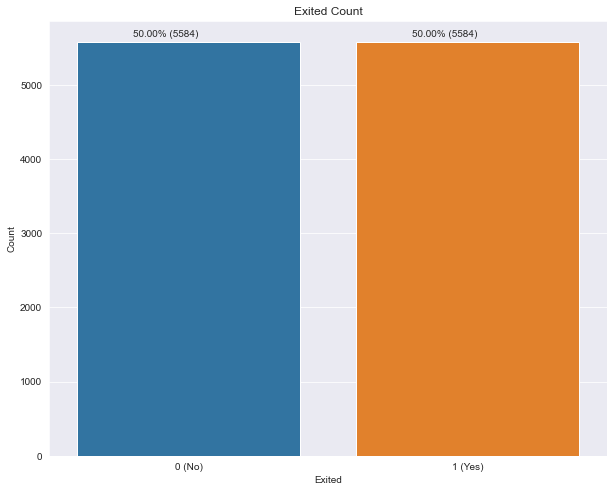

In [22]:
plt.figure(figsize=(10, 8))

barplot = sns.countplot(x=y_train_resampled)
barplot.set(
    title="Exited Count",
    xlabel="Exited",
    ylabel="Count",
    xticklabels=["0 (No)", "1 (Yes)"]
)

for p in barplot.patches:
    percentage = p.get_height() / len(y_train_resampled)
    _x = p.get_x() + 0.2
    _y = p.get_height() + 60
    barplot.annotate(f"{percentage:.2%} ({p.get_height()})", (_x, _y))

In [59]:
x_train_final = x_train_resampled
y_train_final = y_train_resampled
x_test_final = x_test_scaled
y_test_final = y_test

print("Shape of training x:", x_train_final.shape)
print("Shape of training y:", y_train_final.shape)
print("Shape of testing x:", x_test_final.shape)
print("Shape of testing y:", y_test_final.shape)

Shape of training x: (11168, 12)
Shape of training y: (11168,)
Shape of testing x: (3000, 12)
Shape of testing y: (3000,)


# 4. Model Implementation <a id="model_implementation"/>

## 4.1 ? <a id="model_1"/>

### 4.1.1 Base Model <a id="base_model_1"/>

### 4.1.2 Model Hyperparameter Tuning <a id="model_hyperparameter_tuning_1"/>

### 4.1.3 Final Model <a id="final_model_1"/>

## 4.2 Artificial Neural Network <a id="model_2"/>

### 4.2.1 Base Model <a id="base_model_2"/>

In [ ]:
ann_model = MLPClassifier(
    hidden_layer_sizes=(200, 200),
    activation="relu",
    solver="adam",
    alpha=1e-06,
    max_iter=50,
    random_state=8
)
ann_model.fit(x_train_final, y_train_final)

In [ ]:
ann_accuracy = ann_model.score(x_test_final, y_test_final)

print(f"ANN accuracy: {ann_accuracy:.2%}")

In [ ]:
ann_train_accuracy = ann_model.score(x_train_final, y_train_final)

print(f"ANN training accuracy: {ann_train_accuracy:.2%}")

In [ ]:
y_test_pred = ann_model.predict(x_test_final)

confusion_matrix(y_test_final, y_test_pred)

In [ ]:
print(classification_report(y_test_final, y_test_pred))

### 4.2.2 Model Hyperparameter Tuning <a id="model_hyperparameter_tuning_2"/>

In [24]:
ann_test_model = MLPClassifier(
    hidden_layer_sizes=100,
    activation="logistic",
    solver="lbfgs",
    alpha=0.001,
    max_iter=50,
    random_state=0
)
ann_test_model.fit(x_train_final, y_train_final)

ann_train_accuracy = ann_test_model.score(x_train_final, y_train_final)
print(f"ANN training accuracy: {ann_train_accuracy:.2%}")

ann_test_accuracy = ann_test_model.score(x_test_final, y_test_final)
print(f"ANN accuracy: {ann_test_accuracy:.2%}")
# 100 -> 81.96, 79.77
# 200 -> 52, 77
# (150, 100) -> 50, 79

ANN training accuracy: 81.96%
ANN accuracy: 79.77%


C:\Users\Choong Man Shun\.virtualenvs\odl-txaD7ivL-py3.10\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# Best ANN model training accuracy : 79.60%
# Best ANN model test accuracy : 79.75%
# {
#     'activation': 'relu',
#     'alpha': 0.0001,
#     'hidden_layer_sizes': 100, 50, 200, (100, 100), (200, 100), (100, 50),
#     'max_iter': 200,
#     'random_state': 0,
#     'solver': 'lbfgs'
# }

Tuning 1

In [ ]:
param_grid = {
    "hidden_layer_sizes": [
        50, 100, 200, (100, 50), (100, 100)
    ],
    "activation": ["relu"],
    "solver": ["adam"],
    "alpha": [1e-03],
    "max_iter": [100],
    "random_state": [0]
}
ann_cv_model1 = GridSearchCV(
    estimator=MLPClassifier(),
    param_grid=param_grid,
    verbose=1
)
ann_cv_model1.fit(x_train_final, y_train_final)

In [33]:
ann_cv_train_accuracy1 = ann_cv_model1.best_score_
ann_cv_accuracy1 = ann_cv_model1.score(x_test_final, y_test_final)

print(f"Best ANN model training accuracy : {ann_cv_train_accuracy1:.2%}")
print(f"Best ANN model test accuracy : {ann_cv_accuracy1:.2%}")

Best ANN model training accuracy : 87.10%
Best ANN model test accuracy : 80.50%


In [34]:
print(f"Best ANN parameters: {ann_cv_model1.best_params_}")

Best ANN parameters: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (100, 100), 'max_iter': 100, 'random_state': 0, 'solver': 'adam'}


In [53]:
ann_cv_results1 = pd.DataFrame(ann_cv_model1.cv_results_)
ann_cv_results1.sort_values(by="mean_test_score", ascending=False, inplace=True)

ann_cv_results1[["mean_test_score", "params"]].values()

TypeError: 'numpy.ndarray' object is not callable

Tuning 2

In [43]:
param_grid = {
    "hidden_layer_sizes": [
        300, (100, 100), (200, 100)
    ],
    "activation": ["relu"],
    "solver": ["adam"],
    "alpha": [1e-03],
    "max_iter": [100],
    "random_state": [0]
}
ann_cv_model2 = GridSearchCV(
    estimator=MLPClassifier(),
    param_grid=param_grid,
    verbose=1
)
ann_cv_model2.fit(x_train_final, y_train_final)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


C:\Users\Choong Man Shun\.virtualenvs\odl-txaD7ivL-py3.10\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Choong Man Shun\.virtualenvs\odl-txaD7ivL-py3.10\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Choong Man Shun\.virtualenvs\odl-txaD7ivL-py3.10\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Choong Man Shun\.virtualenvs\odl-txaD7ivL-py3.10\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached 

GridSearchCV(estimator=MLPClassifier(),
             param_grid={'activation': ['relu'], 'alpha': [0.001],
                         'hidden_layer_sizes': [300, (100, 100), (200, 100)],
                         'max_iter': [100], 'random_state': [0],
                         'solver': ['adam']},
             verbose=1)

In [44]:
ann_cv_train_accuracy2 = ann_cv_model2.best_score_
ann_cv_accuracy2 = ann_cv_model2.score(x_test_final, y_test_final)

print(f"Best ANN model training accuracy : {ann_cv_train_accuracy2:.2%}")
print(f"Best ANN model test accuracy : {ann_cv_accuracy2:.2%}")

Best ANN model training accuracy : 88.17%
Best ANN model test accuracy : 80.33%


In [45]:
print(f"Best ANN parameters: {ann_cv_model2.best_params_}")

Best ANN parameters: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (200, 100), 'max_iter': 100, 'random_state': 0, 'solver': 'adam'}


In [48]:
ann_cv_results2 = pd.DataFrame(ann_cv_model2.cv_results_)
ann_cv_results2.sort_values(by="mean_test_score", ascending=False, inplace=True)

ann_cv_results2[["mean_test_score", "params"]].values

array([[0.8817185531105206,
        {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (200, 100), 'max_iter': 100, 'random_state': 0, 'solver': 'adam'}],
       [0.8709734867361515,
        {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (100, 100), 'max_iter': 100, 'random_state': 0, 'solver': 'adam'}],
       [0.8407969735324411,
        {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': 300, 'max_iter': 100, 'random_state': 0, 'solver': 'adam'}]],
      dtype=object)

Tuning 3

In [49]:
param_grid = {
    "hidden_layer_sizes": [(200, 100)],
    "activation": ["relu", "logistic"],
    "solver": ["lbfgs", "sgd", "adam"],
    "alpha": [1e-03],
    "max_iter": [100],
    "random_state": [0]
}
ann_cv_model3 = GridSearchCV(
    estimator=MLPClassifier(),
    param_grid=param_grid,
    verbose=1
)
ann_cv_model3.fit(x_train_final, y_train_final)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


C:\Users\Choong Man Shun\.virtualenvs\odl-txaD7ivL-py3.10\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Choong Man Shun\.virtualenvs\odl-txaD7ivL-py3.10\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Choong Man Shun\.virtualenvs\odl-txaD7ivL-py3.10\lib\site-packages\sklearn\neural_network\_multilayer

GridSearchCV(estimator=MLPClassifier(),
             param_grid={'activation': ['relu', 'logistic'], 'alpha': [0.001],
                         'hidden_layer_sizes': [(200, 100)], 'max_iter': [100],
                         'random_state': [0],
                         'solver': ['lbfgs', 'sgd', 'adam']},
             verbose=1)

In [50]:
ann_cv_train_accuracy3 = ann_cv_model3.best_score_
ann_cv_accuracy3 = ann_cv_model3.score(x_test_final, y_test_final)

print(f"Best ANN model training accuracy : {ann_cv_train_accuracy3:.2%}")
print(f"Best ANN model test accuracy : {ann_cv_accuracy3:.2%}")

Best ANN model training accuracy : 88.17%
Best ANN model test accuracy : 80.33%


In [51]:
print(f"Best ANN parameters: {ann_cv_model3.best_params_}")

Best ANN parameters: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (200, 100), 'max_iter': 100, 'random_state': 0, 'solver': 'adam'}


In [54]:
ann_cv_results3 = pd.DataFrame(ann_cv_model3.cv_results_)
ann_cv_results3.sort_values(by="mean_test_score", ascending=False, inplace=True)

ann_cv_results3[["mean_test_score", "params"]].values

array([[0.8817185531105206,
        {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (200, 100), 'max_iter': 100, 'random_state': 0, 'solver': 'adam'}],
       [0.872585066278148,
        {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (200, 100), 'max_iter': 100, 'random_state': 0, 'solver': 'lbfgs'}],
       [0.7870697974269735,
        {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (200, 100), 'max_iter': 100, 'random_state': 0, 'solver': 'sgd'}],
       [0.7856369882702733,
        {'activation': 'logistic', 'alpha': 0.001, 'hidden_layer_sizes': (200, 100), 'max_iter': 100, 'random_state': 0, 'solver': 'adam'}],
       [0.785281291733303,
        {'activation': 'logistic', 'alpha': 0.001, 'hidden_layer_sizes': (200, 100), 'max_iter': 100, 'random_state': 0, 'solver': 'lbfgs'}],
       [0.6818575121047877,
        {'activation': 'logistic', 'alpha': 0.001, 'hidden_layer_sizes': (200, 100), 'max_iter': 100, 'random_state': 0, 'solver': 'sgd'}]],

Tuning 4

In [55]:
param_grid = {
    "hidden_layer_sizes": [(200, 100)],
    "activation": ["relu"],
    "solver": ["adam"],
    "alpha": [1e-03, 0.01],
    "max_iter": [100, 200],
    "random_state": [0]
}
ann_cv_model4 = GridSearchCV(
    estimator=MLPClassifier(),
    param_grid=param_grid,
    verbose=2
)
ann_cv_model4.fit(x_train_final, y_train_final)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


C:\Users\Choong Man Shun\.virtualenvs\odl-txaD7ivL-py3.10\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Choong Man Shun\.virtualenvs\odl-txaD7ivL-py3.10\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Choong Man Shun\.virtualenvs\odl-txaD7ivL-py3.10\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Choong Man Shun\.virtualenvs\odl-txaD7ivL-py3.10\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached 

GridSearchCV(estimator=MLPClassifier(),
             param_grid={'activation': ['relu'], 'alpha': [0.001, 0.01],
                         'hidden_layer_sizes': [(200, 100)],
                         'max_iter': [100, 200], 'random_state': [0],
                         'solver': ['adam']},
             verbose=1)

In [56]:
ann_cv_train_accuracy4 = ann_cv_model4.best_score_
ann_cv_accuracy4 = ann_cv_model4.score(x_test_final, y_test_final)

print(f"Best ANN model training accuracy : {ann_cv_train_accuracy4:.2%}")
print(f"Best ANN model test accuracy : {ann_cv_accuracy4:.2%}")

Best ANN model training accuracy : 89.97%
Best ANN model test accuracy : 65.40%


In [57]:
print(f"Best ANN parameters: {ann_cv_model4.best_params_}")

Best ANN parameters: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (200, 100), 'max_iter': 200, 'random_state': 0, 'solver': 'adam'}


In [58]:
ann_cv_results4 = pd.DataFrame(ann_cv_model4.cv_results_)
ann_cv_results4.sort_values(by="mean_test_score", ascending=False, inplace=True)

ann_cv_results4[["mean_test_score", "params"]].values

array([[0.8997162285743153,
        {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (200, 100), 'max_iter': 200, 'random_state': 0, 'solver': 'adam'}],
       [0.887536308349447,
        {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (200, 100), 'max_iter': 200, 'random_state': 0, 'solver': 'adam'}],
       [0.8817185531105206,
        {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (200, 100), 'max_iter': 100, 'random_state': 0, 'solver': 'adam'}],
       [0.8806440865651188,
        {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (200, 100), 'max_iter': 100, 'random_state': 0, 'solver': 'adam'}]],
      dtype=object)

Tuning 5

In [59]:
param_grid = {
    "hidden_layer_sizes": [(200, 100)],
    "activation": ["relu"],
    "solver": ["adam"],
    "alpha": [1e-03],
    "max_iter": [200],
    "random_state": [0, 1, 2, 3, 4]
}
ann_cv_model5 = GridSearchCV(
    estimator=MLPClassifier(),
    param_grid=param_grid,
    verbose=1
)
ann_cv_model5.fit(x_train_final, y_train_final)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


C:\Users\Choong Man Shun\.virtualenvs\odl-txaD7ivL-py3.10\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Choong Man Shun\.virtualenvs\odl-txaD7ivL-py3.10\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Choong Man Shun\.virtualenvs\odl-txaD7ivL-py3.10\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Choong Man Shun\.virtualenvs\odl-txaD7ivL-py3.10\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached 

GridSearchCV(estimator=MLPClassifier(),
             param_grid={'activation': ['relu'], 'alpha': [0.001],
                         'hidden_layer_sizes': [(200, 100)], 'max_iter': [200],
                         'random_state': [0, 1, 2, 3, 4], 'solver': ['adam']},
             verbose=1)

In [60]:
ann_cv_train_accuracy5 = ann_cv_model5.best_score_
ann_cv_accuracy5 = ann_cv_model5.score(x_test_final, y_test_final)

print(f"Best ANN model training accuracy : {ann_cv_train_accuracy5:.2%}")
print(f"Best ANN model test accuracy : {ann_cv_accuracy5:.2%}")

Best ANN model training accuracy : 90.06%
Best ANN model test accuracy : 80.27%


In [61]:
print(f"Best ANN parameters: {ann_cv_model5.best_params_}")

Best ANN parameters: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (200, 100), 'max_iter': 200, 'random_state': 2, 'solver': 'adam'}


In [62]:
ann_cv_results5 = pd.DataFrame(ann_cv_model5.cv_results_)
ann_cv_results5.sort_values(by="mean_test_score", ascending=False, inplace=True)

ann_cv_results5[["mean_test_score", "params"]].values

array([[0.9006116440901734,
        {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (200, 100), 'max_iter': 200, 'random_state': 2, 'solver': 'adam'}],
       [0.8997162285743153,
        {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (200, 100), 'max_iter': 200, 'random_state': 0, 'solver': 'adam'}],
       [0.8969405366960395,
        {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (200, 100), 'max_iter': 200, 'random_state': 3, 'solver': 'adam'}],
       [0.8969402159597571,
        {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (200, 100), 'max_iter': 200, 'random_state': 4, 'solver': 'adam'}],
       [0.8961346466949529,
        {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (200, 100), 'max_iter': 200, 'random_state': 1, 'solver': 'adam'}]],
      dtype=object)

### 4.2.3 Final Model <a id="final_model_2"/>

## 4.3 Deep Neural Network (DNN) <a id="model_3"/>

### 4.3.1 Base Model <a id="base_model_3"/>

In [27]:
dnn_model = Sequential()
dnn_model.add(
    Dense(
        units=12,
        activation="relu",
        kernel_initializer="uniform",
        input_shape=(x_train_final.shape[1],)
    )
)
dnn_model.add(
    Dense(units=6, activation="relu", kernel_initializer="uniform")
)
dnn_model.add(
    Dense(units=2, activation="relu", kernel_initializer="uniform")
)
dnn_model.add(
    Dense(units=1, activation="sigmoid", kernel_initializer="uniform")
)
dnn_model.compile(
    optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"]
)

dnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 12)                156       
                                                                 
 dense_5 (Dense)             (None, 6)                 78        
                                                                 
 dense_6 (Dense)             (None, 2)                 14        
                                                                 
 dense_7 (Dense)             (None, 1)                 3         
                                                                 
Total params: 251
Trainable params: 251
Non-trainable params: 0
_________________________________________________________________


In [28]:
dnn_history = dnn_model.fit(
    x_train_final, y_train_final, epochs=100, validation_data=(x_test_final, y_test_final)
)

Epoch 1/100
349/349 [==============================] - 3s 2ms/step - loss: 0.6476 - accuracy: 0.6526 - val_loss: 0.7180 - val_accuracy: 0.6560
Epoch 2/100
349/349 [==============================] - 1s 2ms/step - loss: 0.5820 - accuracy: 0.7412 - val_loss: 0.6362 - val_accuracy: 0.7237
Epoch 3/100
349/349 [==============================] - 1s 2ms/step - loss: 0.5406 - accuracy: 0.7592 - val_loss: 0.5921 - val_accuracy: 0.7473
Epoch 4/100
349/349 [==============================] - 1s 2ms/step - loss: 0.5112 - accuracy: 0.7688 - val_loss: 0.5513 - val_accuracy: 0.7683
Epoch 5/100
349/349 [==============================] - 1s 1ms/step - loss: 0.4940 - accuracy: 0.7727 - val_loss: 0.5254 - val_accuracy: 0.7787
Epoch 6/100
349/349 [==============================] - 1s 2ms/step - loss: 0.4827 - accuracy: 0.7768 - val_loss: 0.5530 - val_accuracy: 0.7510
Epoch 7/100
349/349 [==============================] - 1s 1ms/step - loss: 0.4754 - accuracy: 0.7780 - val_loss: 0.5067 - val_accuracy: 0.7820

In [29]:
dnn_model.evaluate(x_test_final, y_test_final)

94/94 [==============================] - 0s 1ms/step - loss: 0.4333 - accuracy: 0.8053


[0.4332866966724396, 0.8053333163261414]

### 4.3.2 Model Hyperparameter Tuning <a id="model_hyperparameter_tuning_3"/>

Tuning 1

In [37]:
dnn_model1 = Sequential()
dnn_model1.add(
    Dense(
        units=6,
        activation="relu",
        kernel_initializer="uniform",  # "normal"
        input_shape=(x_train_final.shape[1],)
    )
)
dnn_model1.add(
    Dense(
        units=6, activation="relu", kernel_initializer="uniform"  # "normal"
    )
)
dnn_model1.add(
    Dense(
        units=1, activation="sigmoid", kernel_initializer="uniform"  # "normal"
    )
)
dnn_model1.compile(
    optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"]
)

dnn_model1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 6)                 78        
                                                                 
 dense_21 (Dense)            (None, 6)                 42        
                                                                 
 dense_22 (Dense)            (None, 1)                 7         
                                                                 
Total params: 127
Trainable params: 127
Non-trainable params: 0
_________________________________________________________________


In [38]:
dnn_history1 = dnn_model1.fit(
    x_train_final, y_train_final, epochs=100, validation_data=(x_test_final, y_test_final)
)

Epoch 1/100
349/349 [==============================] - 3s 7ms/step - loss: 0.6451 - accuracy: 0.6537 - val_loss: 0.6394 - val_accuracy: 0.6977
Epoch 2/100
349/349 [==============================] - 1s 2ms/step - loss: 0.5508 - accuracy: 0.7380 - val_loss: 0.5708 - val_accuracy: 0.7260
Epoch 3/100
349/349 [==============================] - 1s 2ms/step - loss: 0.5116 - accuracy: 0.7559 - val_loss: 0.5144 - val_accuracy: 0.7493
Epoch 4/100
349/349 [==============================] - 0s 1ms/step - loss: 0.4907 - accuracy: 0.7658 - val_loss: 0.4902 - val_accuracy: 0.7577
Epoch 5/100
349/349 [==============================] - 1s 2ms/step - loss: 0.4794 - accuracy: 0.7654 - val_loss: 0.5026 - val_accuracy: 0.7470
Epoch 6/100
349/349 [==============================] - 0s 1ms/step - loss: 0.4722 - accuracy: 0.7703 - val_loss: 0.4864 - val_accuracy: 0.7610
Epoch 7/100
349/349 [==============================] - 0s 1ms/step - loss: 0.4679 - accuracy: 0.7729 - val_loss: 0.4792 - val_accuracy: 0.7630

Tuning 2

In [39]:
dnn_model2 = Sequential()
dnn_model2.add(
    Dense(
        units=6,
        activation="relu",
        kernel_initializer="normal",
        input_shape=(x_train_final.shape[1],)
    )
)
dnn_model2.add(
    Dense(
        units=6, activation="relu", kernel_initializer="normal"
    )
)
dnn_model2.add(
    Dense(
        units=1, activation="sigmoid", kernel_initializer="normal"
    )
)
dnn_model2.compile(
    optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"]
)

dnn_model2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 6)                 78        
                                                                 
 dense_24 (Dense)            (None, 6)                 42        
                                                                 
 dense_25 (Dense)            (None, 1)                 7         
                                                                 
Total params: 127
Trainable params: 127
Non-trainable params: 0
_________________________________________________________________


In [40]:
dnn_history2 = dnn_model2.fit(
    x_train_final, y_train_final, epochs=100, validation_data=(x_test_final, y_test_final)
)

Epoch 1/100
349/349 [==============================] - 2s 2ms/step - loss: 0.6363 - accuracy: 0.6716 - val_loss: 0.5519 - val_accuracy: 0.6973
Epoch 2/100
349/349 [==============================] - 1s 2ms/step - loss: 0.5465 - accuracy: 0.7305 - val_loss: 0.5698 - val_accuracy: 0.6983
Epoch 3/100
349/349 [==============================] - 1s 1ms/step - loss: 0.5240 - accuracy: 0.7465 - val_loss: 0.5250 - val_accuracy: 0.7413
Epoch 4/100
349/349 [==============================] - 1s 2ms/step - loss: 0.5052 - accuracy: 0.7583 - val_loss: 0.5554 - val_accuracy: 0.7173
Epoch 5/100
349/349 [==============================] - 1s 1ms/step - loss: 0.4896 - accuracy: 0.7667 - val_loss: 0.5081 - val_accuracy: 0.7433
Epoch 6/100
349/349 [==============================] - 1s 2ms/step - loss: 0.4786 - accuracy: 0.7684 - val_loss: 0.5079 - val_accuracy: 0.7457
Epoch 7/100
349/349 [==============================] - 1s 1ms/step - loss: 0.4714 - accuracy: 0.7715 - val_loss: 0.4917 - val_accuracy: 0.7553

Tuning 3

In [41]:
dnn_model3 = Sequential()
dnn_model3.add(
    Dense(
        units=6,
        activation="relu",
        kernel_initializer="normal",
        input_shape=(x_train_final.shape[1],)
    )
)
dnn_model3.add(
    Dense(units=6, activation="relu", kernel_initializer="normal")
)
dnn_model3.add(
    Dense(units=3, activation="relu", kernel_initializer="normal")
)
dnn_model3.add(
    Dense(units=1, activation="sigmoid", kernel_initializer="normal")
)
dnn_model3.compile(
    optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"]
)

dnn_model3.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 6)                 78        
                                                                 
 dense_27 (Dense)            (None, 6)                 42        
                                                                 
 dense_28 (Dense)            (None, 3)                 21        
                                                                 
 dense_29 (Dense)            (None, 1)                 4         
                                                                 
Total params: 145
Trainable params: 145
Non-trainable params: 0
_________________________________________________________________


In [42]:
dnn_history3 = dnn_model3.fit(
    x_train_final, y_train_final, epochs=100, validation_data=(x_test_final, y_test_final)
)

Epoch 1/100
349/349 [==============================] - 1s 2ms/step - loss: 0.6551 - accuracy: 0.6081 - val_loss: 0.5156 - val_accuracy: 0.7353
Epoch 2/100
349/349 [==============================] - 1s 2ms/step - loss: 0.5709 - accuracy: 0.7457 - val_loss: 0.4898 - val_accuracy: 0.7403
Epoch 3/100
349/349 [==============================] - 0s 1ms/step - loss: 0.5373 - accuracy: 0.7619 - val_loss: 0.4776 - val_accuracy: 0.7553
Epoch 4/100
349/349 [==============================] - 1s 2ms/step - loss: 0.5167 - accuracy: 0.7690 - val_loss: 0.4761 - val_accuracy: 0.7533
Epoch 5/100
349/349 [==============================] - 1s 2ms/step - loss: 0.5043 - accuracy: 0.7761 - val_loss: 0.4711 - val_accuracy: 0.7660
Epoch 6/100
349/349 [==============================] - 1s 2ms/step - loss: 0.4941 - accuracy: 0.7772 - val_loss: 0.4938 - val_accuracy: 0.7463
Epoch 7/100
349/349 [==============================] - 1s 1ms/step - loss: 0.4857 - accuracy: 0.7774 - val_loss: 0.4477 - val_accuracy: 0.7853

Tuning 4

In [54]:
dnn_model4 = Sequential()
dnn_model4.add(
    Dense(
        units=6,
        activation="relu",
        kernel_initializer="normal",
        input_shape=(x_train_final.shape[1],)
    )
)

dnn_model4.add(Dropout(rate = 0.1))
dnn_model4.add(BatchNormalization())

dnn_model4.add(
    Dense(units=3, activation="relu", kernel_initializer="normal")
)

dnn_model4.add(Dropout(rate = 0.1))
dnn_model4.add(BatchNormalization())

dnn_model4.add(
    Dense(units=1, activation="sigmoid", kernel_initializer="normal")
)
dnn_model4.compile(
    optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"]
)

dnn_model4.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 6)                 78        
                                                                 
 dropout_4 (Dropout)         (None, 6)                 0         
                                                                 
 batch_normalization_4 (Batc  (None, 6)                24        
 hNormalization)                                                 
                                                                 
 dense_46 (Dense)            (None, 3)                 21        
                                                                 
 dropout_5 (Dropout)         (None, 3)                 0         
                                                                 
 batch_normalization_5 (Batc  (None, 3)                12        
 hNormalization)                                     

In [55]:
dnn_history4 = dnn_model4.fit(
    x_train_final, y_train_final, epochs=100, validation_data=(x_test_final, y_test_final)
)

Epoch 1/100
349/349 [==============================] - 2s 3ms/step - loss: 0.6145 - accuracy: 0.6941 - val_loss: 0.5911 - val_accuracy: 0.7427
Epoch 2/100
349/349 [==============================] - 1s 2ms/step - loss: 0.5359 - accuracy: 0.7356 - val_loss: 0.4800 - val_accuracy: 0.7763
Epoch 3/100
349/349 [==============================] - 1s 2ms/step - loss: 0.5189 - accuracy: 0.7444 - val_loss: 0.4654 - val_accuracy: 0.7830
Epoch 4/100
349/349 [==============================] - 1s 2ms/step - loss: 0.5100 - accuracy: 0.7504 - val_loss: 0.4857 - val_accuracy: 0.7703
Epoch 5/100
349/349 [==============================] - 1s 2ms/step - loss: 0.5134 - accuracy: 0.7473 - val_loss: 0.4639 - val_accuracy: 0.7963
Epoch 6/100
349/349 [==============================] - 1s 2ms/step - loss: 0.5100 - accuracy: 0.7497 - val_loss: 0.4689 - val_accuracy: 0.7803
Epoch 7/100
349/349 [==============================] - 1s 2ms/step - loss: 0.5021 - accuracy: 0.7586 - val_loss: 0.4799 - val_accuracy: 0.7713

Tuning 5

In [62]:
model = Sequential()

# adding the first input layer and the first hidden layer
model.add(Dense(12, kernel_initializer = 'normal', activation = 'relu', input_shape = (x_train_final.shape[1],)))

# adding batch normalization and dropout layer
model.add(Dropout(rate = 0.1))
model.add(BatchNormalization())

# adding the third hidden layer
model.add(Dense(6, kernel_initializer = 'normal', activation = 'relu'))

# adding batch normalization and dropout layer
model.add(Dropout(rate = 0.1))
model.add(BatchNormalization())

# adding the output layer
model.add(Dense(1, kernel_initializer = 'normal', activation = 'sigmoid'))

# compiling the model
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# fitting the model to the training set
model_history = model.fit(
    x_train_final, y_train_final, validation_data=(x_test_final, y_test_final), epochs=100
)

Epoch 1/100
349/349 [==============================] - 5s 3ms/step - loss: 0.5836 - accuracy: 0.7103 - val_loss: 0.5744 - val_accuracy: 0.7417
Epoch 2/100
349/349 [==============================] - 1s 2ms/step - loss: 0.5124 - accuracy: 0.7453 - val_loss: 0.4714 - val_accuracy: 0.7597
Epoch 3/100
349/349 [==============================] - 1s 2ms/step - loss: 0.4893 - accuracy: 0.7635 - val_loss: 0.5127 - val_accuracy: 0.7160
Epoch 4/100
349/349 [==============================] - 1s 2ms/step - loss: 0.4865 - accuracy: 0.7614 - val_loss: 0.4964 - val_accuracy: 0.7353
Epoch 5/100
349/349 [==============================] - 1s 2ms/step - loss: 0.4781 - accuracy: 0.7689 - val_loss: 0.4647 - val_accuracy: 0.7570
Epoch 6/100
349/349 [==============================] - 1s 2ms/step - loss: 0.4817 - accuracy: 0.7667 - val_loss: 0.4695 - val_accuracy: 0.7633
Epoch 7/100
349/349 [==============================] - 1s 2ms/step - loss: 0.4766 - accuracy: 0.7698 - val_loss: 0.4526 - val_accuracy: 0.7797

### 4.3.3 Final Model <a id="final_model_3"/>